<center>
<b> <h1>Olympic Medal Prediction Using Machine Learning : </h1></b>
</center>

<h3>&nbsp;&nbsp;&nbsp;PROBLEM STATEMENT :</h3>        

->Develop a predictive model to estimate the number of medals a country will win at the Olympics using historical data. 
                     
->Evaluate the accuracy of these predictions to inform future strategies.

<h3>&nbsp;&nbsp;&nbsp;Overview of the Dataset :</h3>        

The dataset teams.csv comprises detailed information about various Olympic teams from 
different countries spanning multiple years. Each row represents a team participation 
in a specific Olympic year, capturing a wide range of attributes that offer insights into
the team composition and performance. 
The key columns included in the dataset are:

-> team: The three-letter country code representing the team.

-> country: The full name of the country.

-> year: The year in which the team participated in the Olympics.

-> events: The number of events in which the team competed.

-> athletes: The total number of athletes in the team.

-> age: The average age of the athletes in the team.

-> height: The average height of the athletes in the team (measured in centimeters).

-> weight: The average weight of the athletes in the team (measured in kilograms).

-> medals: The number of medals won by the team in that particular year.

-> prev_medals: The number of medals won by the team in the previous Olympic Games.

-> prev_3_medals: The total number of medals won by the team in the three preceding Olympic Games.

<h3>&nbsp;&nbsp;&nbsp;Step 1 : Conducting Exploratory Data Analysis </h3> 

In [15]:
import pandas as pd

In [16]:
teams = pd.read_csv("E:/ML/teams.csv")

In [17]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [18]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [19]:
teams.tail()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3
2143,ZIM,Zimbabwe,2016,13,31,27.5,167.8,62.2,0,0.0,2.3


In [20]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [21]:
teams.describe()

,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
count,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2014.000000,2014.000000
mean,1994.507463,35.724813,73.693097,24.778591,173.900233,69.271595,10.556437,10.248759,9.449901
std,15.384205,49.490270,127.907577,2.808559,5.357367,7.606507,33.028143,31.951920,28.232227
min,1964.000000,1.000000,1.000000,17.000000,151.000000,43.000000,0.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,23.275000,170.500000,64.500000,0.000000,0.000000,0.000000
50%,1996.000000,13.000000,19.000000,24.700000,174.400000,69.400000,0.000000,0.000000,0.300000
75%,2008.000000,44.000000,70.250000,26.100000,177.300000,73.400000,4.000000,4.000000,4.650000
max,2016.000000,270.000000,839.000000,66.000000,193.000000,148.000000,442.000000,442.000000,314.000000


<h3>&nbsp;&nbsp;&nbsp;STEP 2 : DATA PREPROCESSING</h3> 

In [22]:
teams.isnull().sum()

team               0
country            0
year               0
events             0
athletes           0
age                0
height             0
weight             0
medals             0
prev_medals      130
prev_3_medals    130
dtype: int64

In [23]:
teams = teams.dropna()
teams.isnull().sum()

team             0
country          0
year             0
events           0
athletes         0
age              0
height           0
weight           0
medals           0
prev_medals      0
prev_3_medals    0
dtype: int64

<h3>&nbsp;&nbsp;&nbsp;STEP 3 : DATA VISUALIZATION</h3> 

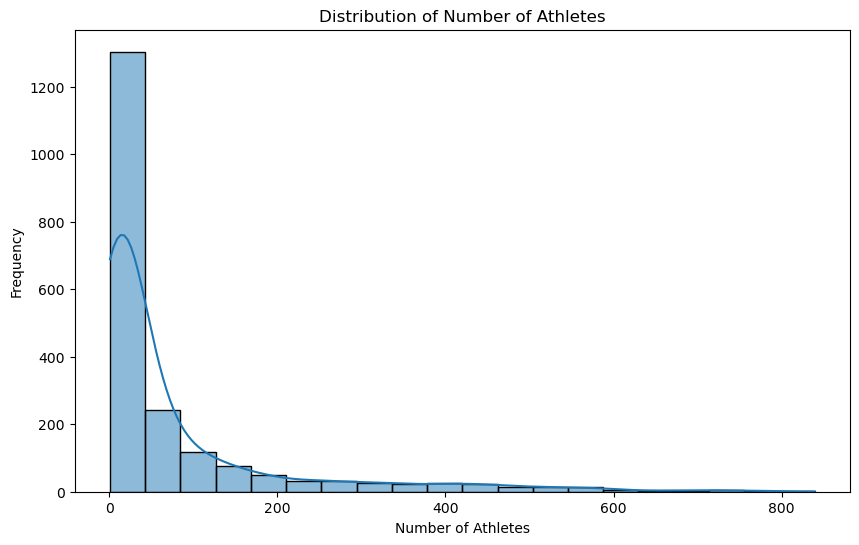

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(teams['athletes'], bins=20, kde=True)
plt.title('Distribution of Number of Athletes')
plt.xlabel('Number of Athletes')
plt.ylabel('Frequency')
plt.show()



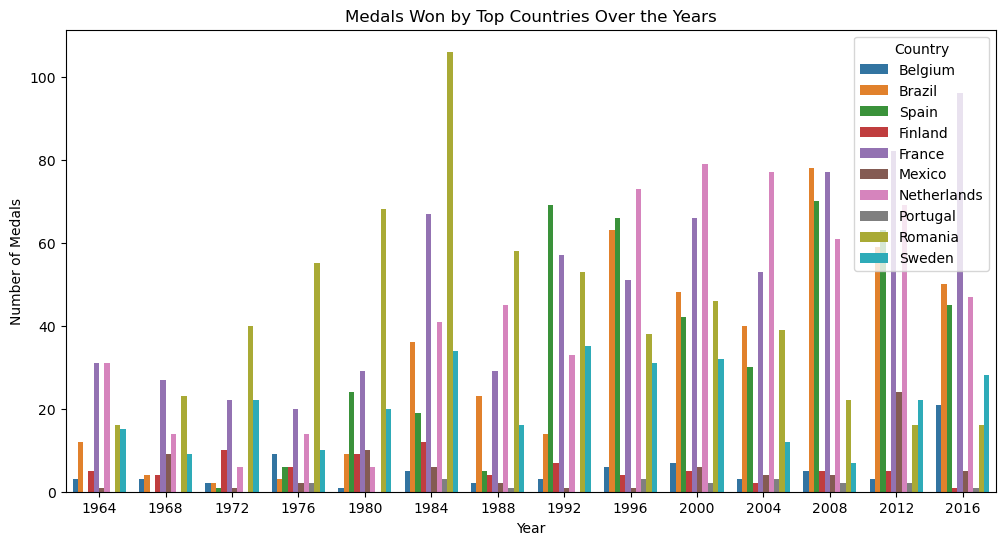

In [25]:
# Example of plotting only a subset of countries
top_countries = teams['country'].value_counts().nlargest(10).index
filtered_teams = teams[teams['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='medals', hue='country', data=filtered_teams)
plt.title('Medals Won by Top Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country', loc='upper right')
plt.show()

#This bar chart shows the medal counts for the top 10 countries over time.

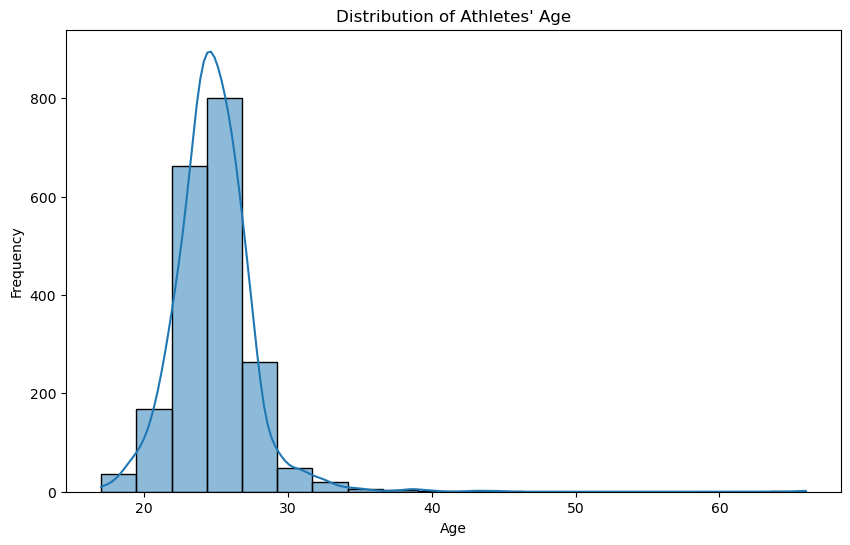

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(teams['age'], bins=20, kde=True)
plt.title('Distribution of Athletes\' Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<h3>&nbsp;&nbsp;&nbsp;STEP 4 : MODEL DEVELOPMENT</h3> 

In [27]:
##Selecting key columns: 
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [28]:
# Compute correlation of 'medals' with other numeric columns
correlation = teams[['athletes', 'age', 'prev_medals', 'medals']].corr()["medals"]
print(correlation)

athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64


In [29]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')

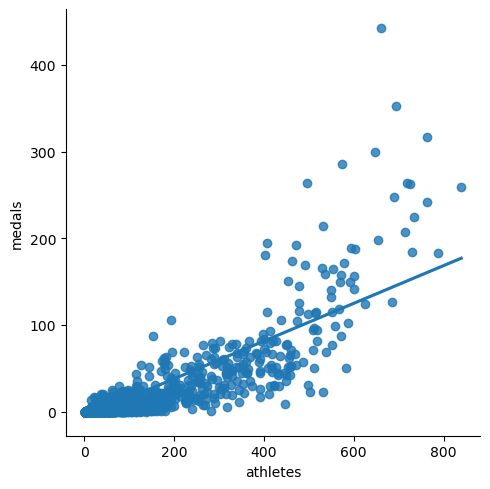

In [30]:
##Plot shows the relationship between the number of athletes and medals won, with a regression line fitted to the data.
sns.lmplot(x='athletes', y='medals', data=teams, fit_reg=True, ci=None)

This analysis demonstrates a positive relationship between the number of athletes and the number of medals won,
indicating that as the number of athletes increases, the number of medals also tends to rise. This suggests a significant 
correlation between these variables.

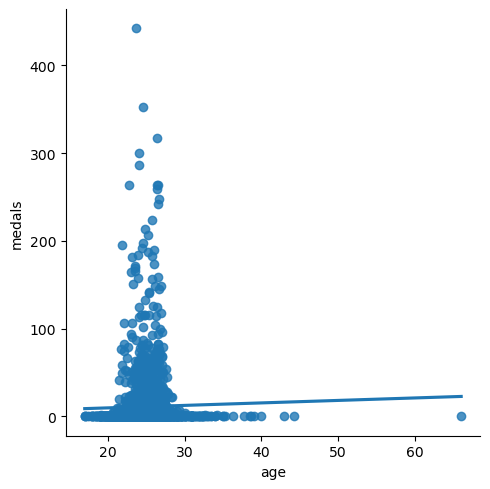

In [32]:
## plot illustrates the relationship between age and medals won, with a regression line fitted to the data.
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True, ci=None) 

In [ ]:
This analysis reveals a non-linear correlation between age and the number of medals won.

In [33]:
teams.shape

(2014, 7)

In [34]:
#Splitting the dataset into training and test sets allows us to train the model on the training data and evaluate 
#its performance on the test data.

train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [35]:
train.shape

(1609, 7)

In [36]:
test.shape

(405, 7)

In [37]:
# Linear Regression Class enables to train and make predictions on linear model.
#`scikit-learn` is a Python library for machine learning that provides tools for data preprocessing, model training,
#evaluation, and selection, as well as various algorithms for classification, regression, clustering.

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [38]:
predictors = ["athletes", "prev_medals"]
target = "medals"

In [39]:
#Train the regression model using the `train` dataset, with `athletes` and `prev_medals` as predictors and `medals` as the
#target.
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [40]:
#Generate predictions for the `test` dataset using the trained regression model, with `athletes` and `prev_medals` as predictors.
predictions = reg.predict(test[predictors])

In [41]:
#Add the generated predictions to the `test` dataset as a new column named `predictions`.
test["predictions"] = predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [42]:
#Set any negative predictions in the `test` dataset to 0, round the predictions to the nearest integer, and display the 
#updated `test` dataset.
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


<h3>&nbsp;&nbsp;&nbsp;STEP 5 : ACCUARCY EVALUATION</h3> 


In [ ]:
Accuracy Metric
We will use mean squared error. This is a good default regression accuracy metric. It's the average of squared differences
between the actual results and your predictions.

In [43]:
from sklearn.metrics import mean_absolute_error

#Calculate the mean absolute error (MAE) between the actual medals and the predicted predictions in the test dataset to 
#evaluate the model's performance.
error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [44]:
#provides a statistical summary of the 'medals' column in the teams DataFrame 
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [45]:
#Assign the predicted values to the 'predictions' column in the `test` DataFrame.
test["predictions"] = predictions

In [46]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.210121
2054,USA,United States,2016,719,26.4,248.0,264,235.568076


In [47]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,6.921667
908,IND,India,2016,130,26.1,6.0,2,11.683176


In [49]:
#Calculate the absolute errors by subtracting the predicted values from the actual medals and taking the absolute value.
errors = (test["medals"] - predictions).abs()

In [50]:
#Compute the error ratio for each team by dividing the mean absolute error by the average number of medals per team.
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team 

In [52]:
#Filter out non-finite values (such as `NaN` or `Inf`) from the `error_ratio` to retain only valid data.
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

<Axes: ylabel='Frequency'>

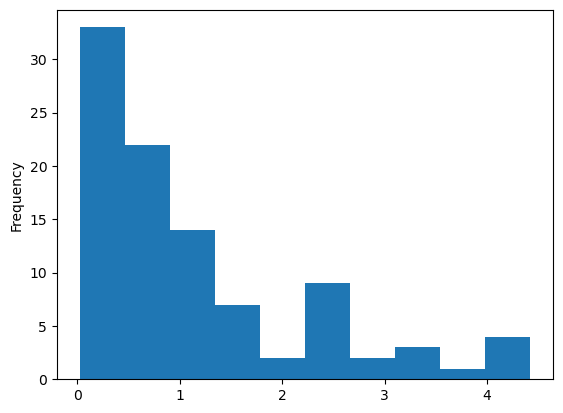

In [53]:
error_ratio.plot.hist()

In [54]:
error_ratio.sort_values()

team
FRA    0.024289
CAN    0.050844
NZL    0.071349
RUS    0.081841
ITA    0.119537
         ...   
PHI    3.563248
JOR    4.065175
BDI    4.136878
AUT    4.257950
NIG    4.423693
Name: medals, Length: 97, dtype: float64

<h3>&nbsp;&nbsp;&nbsp;Next Steps and Model Enhancements:</h3> 

This model performs effectively for countries with a high medal count and a consistent number of annual events. However, for countries with fewer medals, the approach may need adjustment.

Potential Next Steps:

Incorporate additional predictors into the model, such as height, number of athletes, or age.
For countries with low medal counts, consider developing individual athlete models to predict event-specific outcomes. By aggregating these predictions, you can estimate the total number of medals for each country.